In [26]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import json

import windIO
import wind
import windCAD

## Building Geometry

In [27]:
caseDir = r"D:\tempData_depot\simData_CandC\wt_tngE2/"

tapFile = caseDir+"tngTapDefinition.csv"
data = pd.read_csv(tapFile)

faceID = [1,2,3,4,5,6]
name = ['Roof_1','Roof_2','Wall_1','Wall_2','Wall_3','Wall_4']
note = ['','','','','','']
origin = [[0,0,0.08],
          [0,-0.0915,0.07809375],
          [-0.1372,0,0],
          [0,-0.0915,0],
          [0.1372,0,0],
          [0,0.0915,0],]
basisVectors = [[[1,0,0],[0,0.999783057,0.020828814],[0,-0.020828814,0.999783057]],
                [[1,0,0],[0,0.999783057,-0.020828814],[0,0.020828814,0.999783057]],
                [[0,0,-1],[-1,0,0],[0,1,0]],
                [[1,0,0],[0,0,-1],[0,1,0]],
                [[0,0,1],[1,0,0],[0,1,0]],
                [[-1,0,0],[0,0,1],[0,1,0]],]
# origin_plt = [[0, 0],
#                 [0, -0.091519855],
#                 [0, -0.2332],
#                 [0, -0.18559375],
#                 [0, -0.2332],
#                 [0, -0.18559375],]
origin_plt = [[0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              ]
# basisVectors_plt = [[[0, -1], [1, 0]],
#                     [[0, -1],[1, 0]],
#                     [[1, 0], [0, 1]],
#                     [[0, -1], [1, 0]],
#                     [[-1, 0], [0, -1]],
#                     [[0, 1], [-1, 0]],]
# basisVectors_plt = [[[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     ]
basisVectors_plt = [[[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    ]
vertices = [[[-0.091519855,-0.1372],[0,-0.1372],[0,0.1372],[-0.091519855,0.1372],[-0.091519855,-0.1372]],
            [[0,-0.1372],[0.091519855,-0.1372],[0.091519855,0.1372],[0,0.1372],[0,-0.1372]],
            [[-0.0915,-0.2332],[0.0915,-0.2332],[0.0915,-0.15510625],[0,-0.1532],[-0.0915,-0.15510625],[-0.0915,-0.2332]],
            [[0.107519855,-0.1372],[0.185613605,-0.1372],[0.185613605,0.1372],[0.107519855,0.1372],[0.107519855,-0.1372]],
            [[-0.0915,0.2332],[0.0915,0.2332],[0.0915,0.15510625],[0,0.1532],[-0.0915,0.15510625],[-0.0915,0.2332]],
            [[-0.107519855,-0.1372],[-0.185613605,-0.1372],[-0.185613605,0.1372],[-0.107519855,0.1372],[-0.107519855,-0.1372]],]

H = 0.08
B = 0.2744
D = 0.183

In [28]:

faces = []
for i,f in enumerate(faceID):
    idx = data.index[data.faceID == f]
    tapCoords = np.transpose(np.array([data.x[idx], data.y[idx]]))
    tapNos = np.array(data.tapNo[idx],dtype=int)
    idxOrig = idx

    fc = windCAD.face(
                name=name[i],
                ID=f,
                origin=origin[i],
                basisVectors=basisVectors[i],
                origin_plt=origin_plt[i],
                basisVectors_plt=basisVectors_plt[i],
                vertices=vertices[i],
                tapNo=tapNos,
                tapIdx=idxOrig,
                tapName=None,
                tapCoord=tapCoords,
                zoneDict={},
                # nominalPanelAreas=[1.0e-4, 2.45e-4, 4.8e-4, 7.8e-4, 1e-3], #[5e-5, 8e-5, 1.5e-4, 5e-4],
                nominalPanelAreas=[4.8e-4, 7.8e-4, 1e-3],
                numOfNominalPanelAreas=5,
                )
    # fc.plot(figSize=[20,15], overlayPanels=True, overlayTaps=True, overlayTribs=True, overlayZones=True)
    faces.append(fc)

# file = caseDir+'ttu_bldgGeom.json'
# allFaces.writeToFile(file_basic=file)

Generating panels ...
	Working on: Default-Default
		Working on nominal area: 0.00048
zoneBoundary: [[-0.09151985 -0.1372    ]
 [ 0.         -0.1372    ]
 [ 0.          0.1372    ]
 [-0.09151985  0.1372    ]
 [-0.09151985 -0.1372    ]], area: 0.00048
				No. of taps in panel: 4, 	Error in wights: 0.0
				No. of taps in panel: 4, 	Error in wights: 2.220446049250313e-16
				No. of taps in panel: 6, 	Error in wights: 1.1102230246251565e-16
				No. of taps in panel: 4, 	Error in wights: -4.440892098500626e-16
				No. of taps in panel: 6, 	Error in wights: 1.1102230246251565e-16
				No. of taps in panel: 3, 	Error in wights: 0.0
				No. of taps in panel: 6, 	Error in wights: 2.220446049250313e-16
				No. of taps in panel: 6, 	Error in wights: 0.0
				No. of taps in panel: 4, 	Error in wights: 0.0
				No. of taps in panel: 6, 	Error in wights: 0.0
				No. of taps in panel: 6, 	Error in wights: 1.1102230246251565e-16
				No. of taps in panel: 4, 	Error in wights: 0.0
				No. of taps in panel:

d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:426: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")


Generating panels ...
	Working on: Default-Default
		Working on nominal area: 0.00048
zoneBoundary: [[ 0.         -0.1372    ]
 [ 0.09151985 -0.1372    ]
 [ 0.09151985  0.1372    ]
 [ 0.          0.1372    ]
 [ 0.         -0.1372    ]], area: 0.00048
				No. of taps in panel: 31, 	Error in wights: -4.440892098500626e-16
				No. of taps in panel: 25, 	Error in wights: 2.220446049250313e-16
				No. of taps in panel: 1, 	Error in wights: 0.0
				No. of taps in panel: 2, 	Error in wights: -4.440892098500626e-16
				No. of taps in panel: 2, 	Error in wights: 0.0
				No. of taps in panel: 5, 	Error in wights: 0.0
				No. of taps in panel: 2, 	Error in wights: 0.0
				No. of taps in panel: 2, 	Error in wights: 1.1102230246251565e-16
				No. of taps in panel: 4, 	Error in wights: 1.1102230246251565e-16
				No. of taps in panel: 4, 	Error in wights: 1.1102230246251565e-16
				No. of taps in panel: 2, 	Error in wights: 0.0
				No. of taps in panel: 2, 	Error in wights: 1.1102230246251565e-16
			

d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:417: UserWarning: The difference between Zone area and the sum of its panel areas exceeds the tolerance level.
  warnings.warn(f"The difference between Zone area and the sum of its panel areas exceeds the tolerance level.")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:426: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to ac

Generating panels ...
	Working on: Default-Default
		Working on nominal area: 0.00048
zoneBoundary: [[ 0.10751985 -0.1372    ]
 [ 0.1856136  -0.1372    ]
 [ 0.1856136   0.1372    ]
 [ 0.10751985  0.1372    ]
 [ 0.10751985 -0.1372    ]], area: 0.00048
				No. of taps in panel: 2, 	Error in wights: 0.0
				No. of taps in panel: 2, 	Error in wights: 2.220446049250313e-16
				No. of taps in panel: 4, 	Error in wights: 0.0
				No. of taps in panel: 4, 	Error in wights: 0.0
				No. of taps in panel: 4, 	Error in wights: 0.0
				No. of taps in panel: 4, 	Error in wights: 2.220446049250313e-16
				No. of taps in panel: 4, 	Error in wights: -2.220446049250313e-16
				No. of taps in panel: 7, 	Error in wights: 0.0
				No. of taps in panel: 6, 	Error in wights: 0.0
				No. of taps in panel: 8, 	Error in wights: 3.3306690738754696e-16
				No. of taps in panel: 7, 	Error in wights: 0.0
				No. of taps in panel: 4, 	Error in wights: 2.220446049250313e-16
				No. of taps in panel: 4, 	Error in wights

d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:426: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:426: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be r

In [29]:
ttu = wind.bldgCp(bldgName='TTU',
                faces=faces,
                H=H,D=D,B=B,roofSlope=1.2,lScl=0.02,
                caseName='TNG-E2R1',
                )

d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:464: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  num[a] += len(self.panels[z][a])


(-0.25651999999999997,
 0.25651999999999997,
 -0.20417496549999997,
 0.20417496549999997)

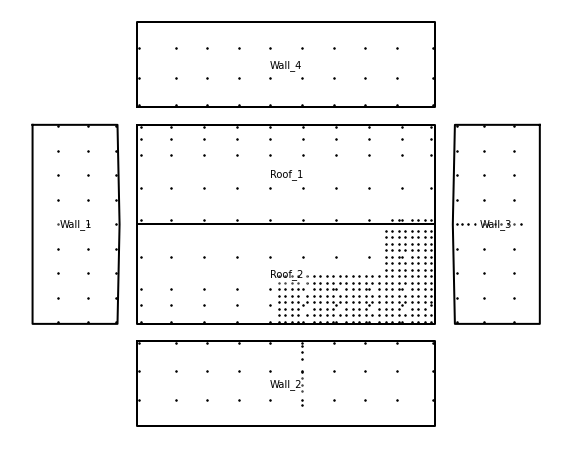

In [30]:
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot()

ttu.plotEdges(ax=ax)
ttu.plotTaps(ax=ax)

ax.axis('equal')
ax.axis('off')

## Wind field

In [31]:
dt = 3.7890e-04

file = r'D:\tempData_depot\simData_CandC\tngE2\tngE2Fr1_profile.csv'
temp = pd.read_csv(file)

file = caseDir+'tngE2Fr1_TH-UofT.npy'
U_TH = np.load(file)
file = caseDir+'tngE2Fr1_TH-VofT.npy'
V_TH = np.load(file)
file = caseDir+'tngE2Fr1_TH-WofT.npy'
W_TH = np.load(file)


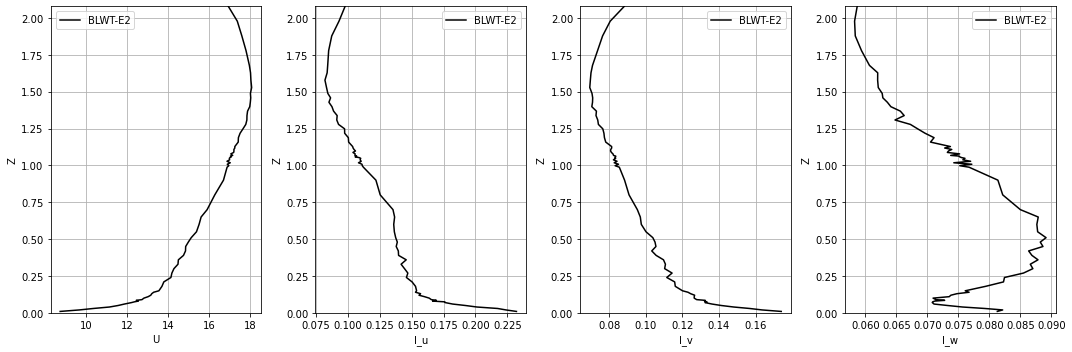

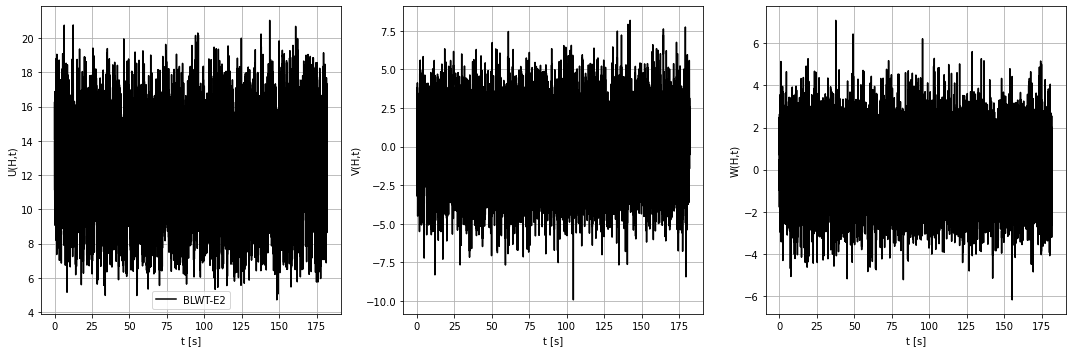

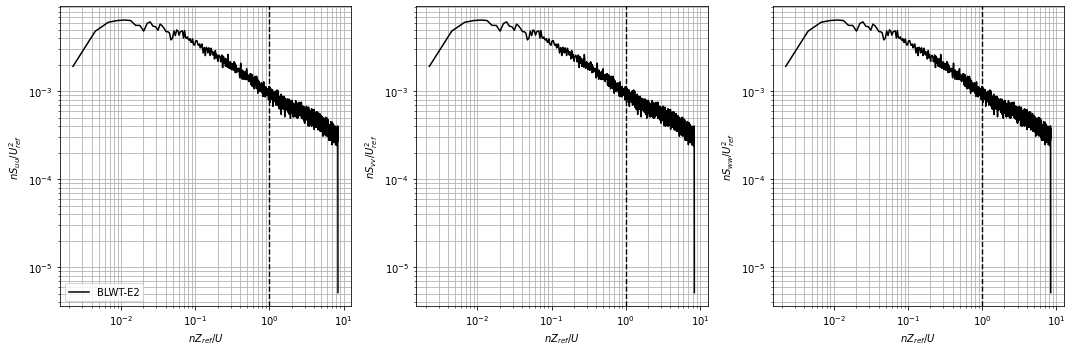

In [32]:

vel = wind.profile(name="BLWT-E2", Z=temp.Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=H,dt=dt,nSpectAvg=64)
vel.plot()

## $C_p$ data

In [33]:
mainRefPitotChnlIdx = 2
fps2mps = 0.3048
Zpitot = 1.48
Ntaps = 456

dataDirHFPI = r'E:\TNG\rawHFPI\tngE2p1/'

N_AoA = 3
# AoAids = [str(i).zfill(3) for i in range(1,N_AoA+1)]
AoAids = ['001', '010', '019']

AoA = np.zeros((N_AoA))
sampleRate = np.zeros((N_AoA))

for i,a in enumerate(AoAids):
    file_pssd = dataDirHFPI+'TNGp1E02R001P'+ AoAids[i] +'a.pssd'
    file_pssr = dataDirHFPI+'TNGp1E02R001P'+ AoAids[i] +'a.pssr'

    cp_data,analog,WTTDATALOG = windIO.readPSSfile(file_pssr,file_pssd)

    if i == 0:
        N_t = np.shape(cp_data)[0]
        CpTH = np.zeros((N_AoA,Ntaps,N_t)) # [N_AoA,Ntaps,Ntime]
        UpitotOfT = np.zeros((N_AoA,N_t))
    CpTH[i,:,:] = np.transpose(cp_data[:,0:Ntaps])
    UpitotOfT[i,:] = 29.917 * np.sqrt(analog[:,mainRefPitotChnlIdx]) * fps2mps
    AoA[i] = np.round(WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][16][0][0],1)
    sampleRate[i] = WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][12][0][0]
Upitot = np.mean(UpitotOfT,axis=1)



In [34]:
ttu = wind.bldgCp(bldgName='TTU',
                faces=faces,
                H=H,D=D,B=B,roofSlope=1.2,lScl=0.02,
                caseName='TNG-E2R1',
                refProfile=vel,
                Zref_input=Zpitot,  # for the Cp TH being input below
                Uref_input=Upitot,  # for the Cp TH being input below
                samplingFreq=sampleRate[0],
                airDensity=1.125,
                AoA=AoA,
                CpOfT=CpTH,  # Cp TH referenced to Uref at Zref
                badTaps=None, # tap numbers to remove
                reReferenceCpToH=True, # whether or not to re-reference Cp building height
                pOfT=None,
                p0ofT=None,
                CpStats=None,
                peakMethod='minmax',
                )


d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:464: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  num[a] += len(self.panels[z][a])


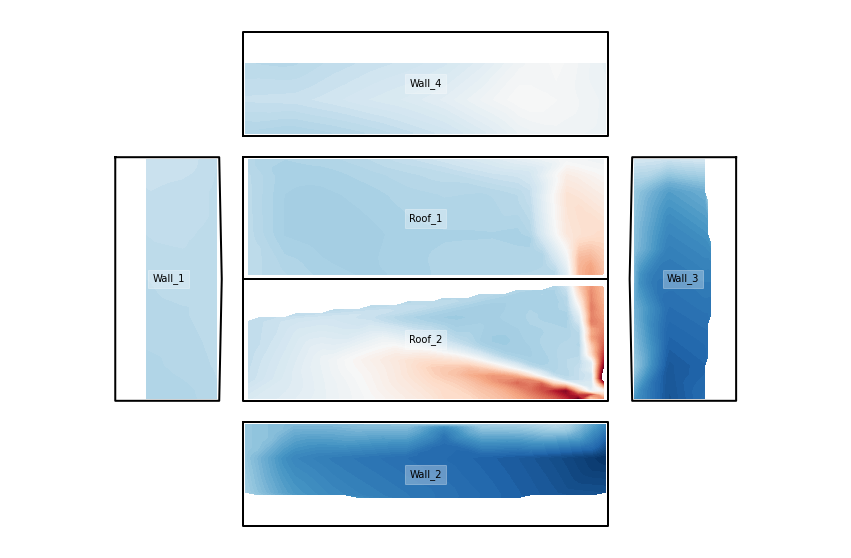

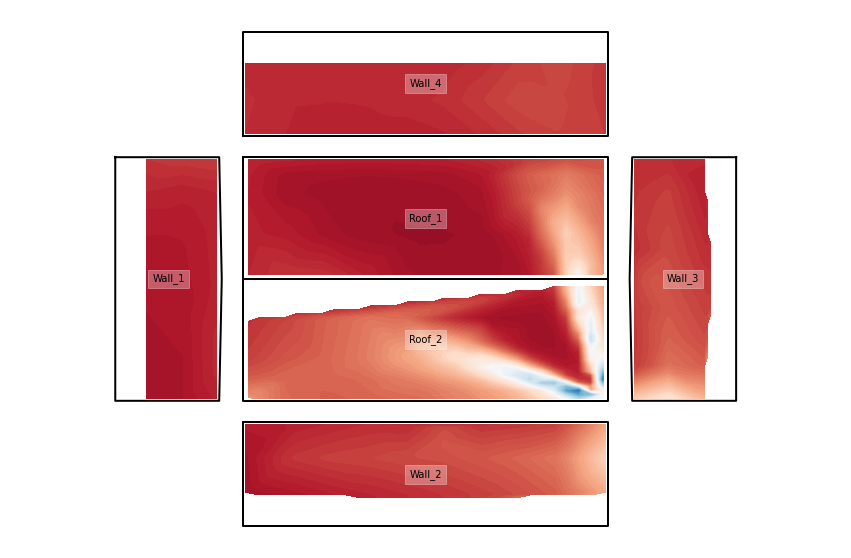

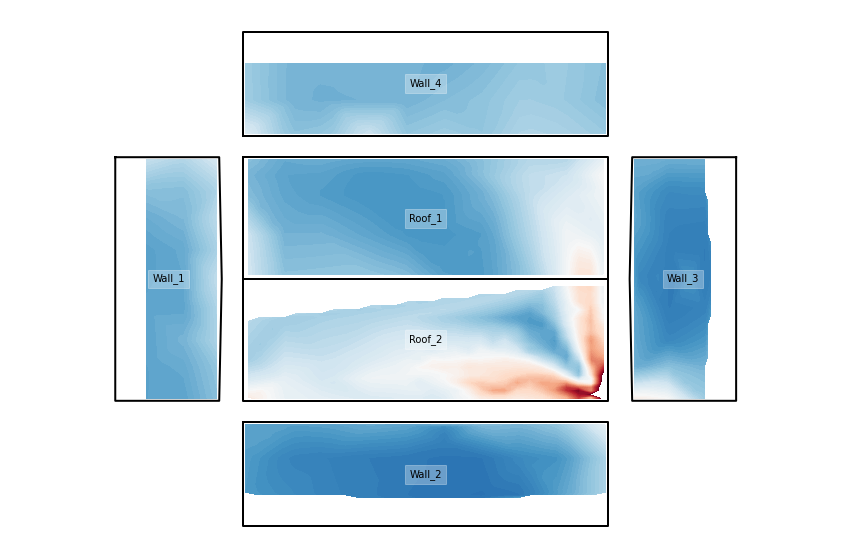

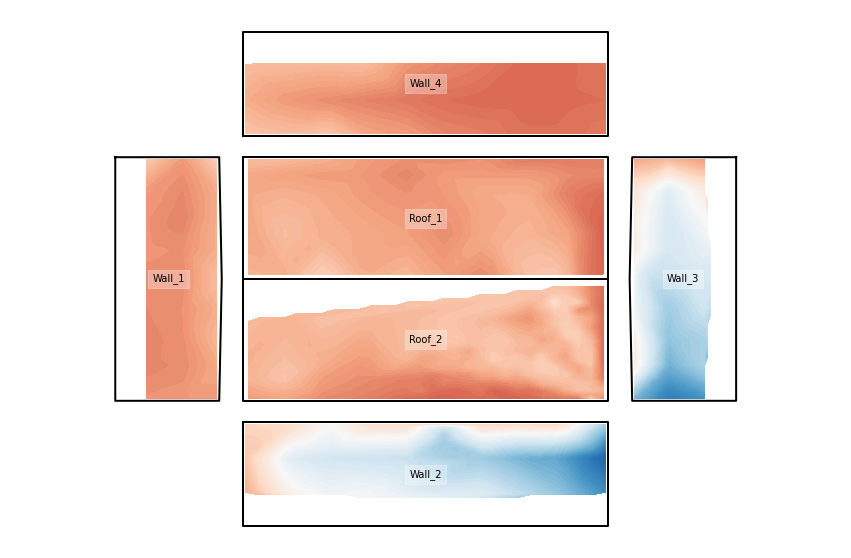

In [35]:
x = ttu.plotTapCpStats(fieldName='mean',dxnIdx=1,figSize=[15,10],fldRange=[-2,0.7])
x = ttu.plotTapCpStats(fieldName='std',dxnIdx=1,figSize=[15,10],fldRange=[0,1])
x = ttu.plotTapCpStats(fieldName='peakMin',dxnIdx=1,figSize=[15,10],fldRange=[-7,1])
x = ttu.plotTapCpStats(fieldName='peakMax',dxnIdx=1,figSize=[15,10],fldRange=[-1,3])

In [36]:
# import matplotlib.patches as patches
# d = 0
# f = 1
# a = 2
# nPnlsA = ttu.NumPanelsPerArea
# nPnls = ttu.NumPanels
# z = 0

# # s = 0
# # e = nPnlsA[a]
# # fld = ttu.CpStatsAreaAvg[z]['mean'][d,s:e]
# # fldNorm = (fld - np.min(fld)) / (np.max(fld) - np.min(fld))

# cmap = plt.get_cmap('RdBu')

# fig = plt.figure(figsize=[20,15])
# ax = fig.add_subplot()

# for f,fc in enumerate(ttu.faces):
#     for p,pnl in enumerate(fc.panels[z][a]):
#         xy = windCAD.transform(np.transpose(pnl.exterior.xy), fc.origin_plt, fc.basisVectors_plt)
#         val = ttu.CpStatsAreaAvg[f][z][a]['peakMin'][d,p]
#         ax.fill(xy[:,0],xy[:,1],color=cmap(val))
#         ax.text(np.mean([min(xy[:,0]), max(xy[:,0])]), np.mean([min(xy[:,1]), max(xy[:,1])]), str(np.round(val,3)),
#                 ha='center')
#         # ax.add_patch(patches.Polygon(xy, facecolor=cmap(val)))
        

# ttu.plotPanels(ax=ax,aIdx=a)
# ttu.plotEdges(ax=ax,showName=False)

# # ttu.plotTaps(ax=ax)
# # fc.plotPanels(ax=ax, aIdx=a)
# # ax.set_xlim((0,0.3))
# # ax.set_ylim((0,0.2))
# ax.axis('equal')



TypeError: tuple indices must be integers or slices, not str

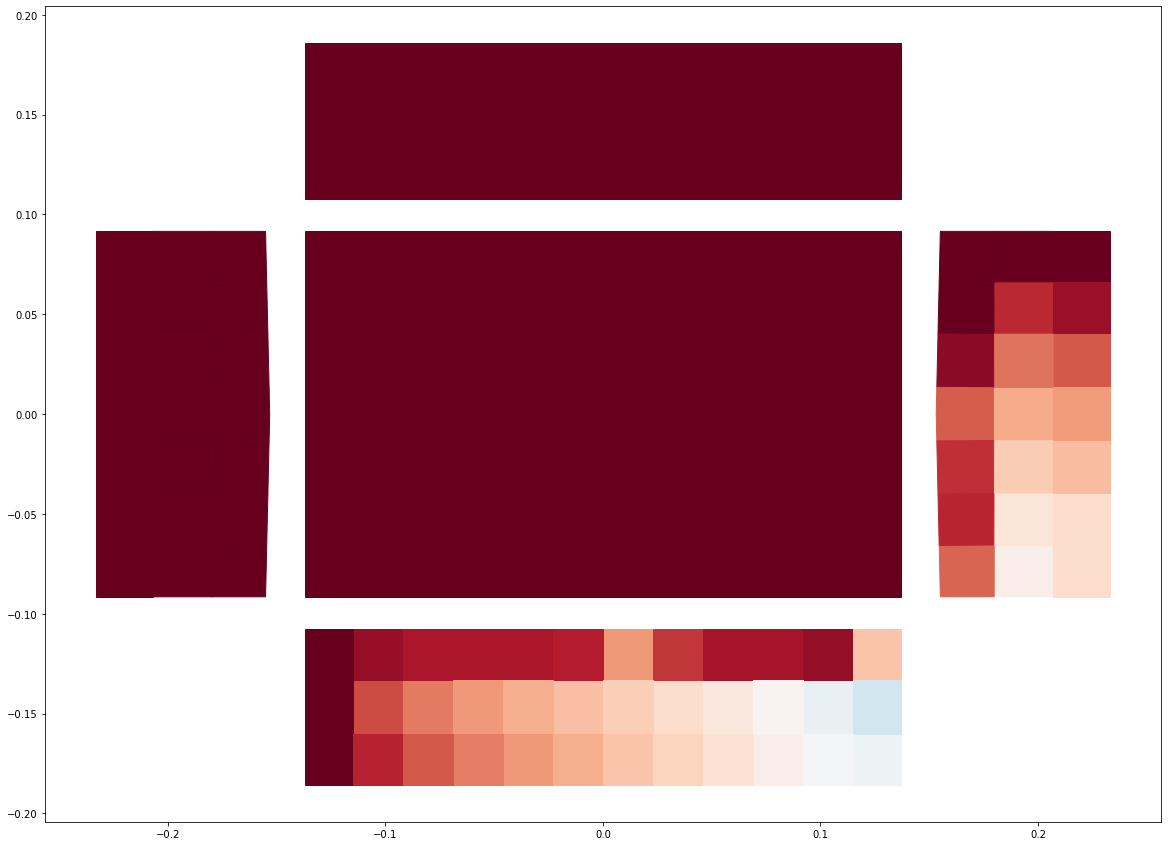

In [37]:
f = 1
fc = ttu[f]

fig = plt.figure(figsize=[20,15])
ax = fig.add_subplot()

ttu.plotPanelCpStats(fieldName='mean',dxnIdx=1,aIdx=0,showValueText=False,ax=ax)
ttu.plotPanels(ax=ax,aIdx=a)
ttu.plotEdges(ax=ax,showName=False)

# fc.plotPanelField(ttu.CpStatsAreaAvg[f], 'peakMin', dIdx=0, aIdx=1, showValueText=True, ax=ax,strFmt="{:.3g}")
# fc.plotPanels(ax=ax, aIdx=1)
# fc.plotTaps(ax=ax)
# fc.plotEdges(ax=ax,showName=False)

ax.axis('equal')


In [ ]:
fc = ttu[0]
for z,zon in enumerate(fc.zoneDict.values()):
    print(zon)